<a href="https://colab.research.google.com/github/Mandy321-Nzimande/Employees-Survey--Dashboard--PoerBI/blob/main/Starbucks_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Starbucks satisfactory survey encode cleaned.csv to Starbucks satisfactory survey encode cleaned.csv


In [7]:
df = pd.read_csv("Starbucks satisfactory survey encode cleaned.csv")
print(df.head())

   Id  gender  age  status  income  visitNo  method  timeSpend  location  \
0   1       1    1       0       0        3       0          1         0   
1   2       1    1       0       0        3       2          0         1   
2   3       0    1       2       0        2       0          1         2   
3   4       1    1       0       0        3       2          0         2   
4   5       0    1       0       0        2       2          1         1   

   membershipCard  ...  chooseRate  promoMethodApp  promoMethodSoc  \
0               0  ...           3               1               1   
1               0  ...           2               1               1   
2               0  ...           3               1               1   
3               1  ...           3               1               1   
4               1  ...           3               1               1   

   promoMethodEmail  promoMethodDeal  promoMethodFriend  promoMethodDisplay  \
0                 1                1       

In [12]:
df.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

In [15]:

df = df.dropna(subset=["timeSpend", "productRate", "visitNo"])
X = df[["timeSpend", "visitNo"]]
y = df["productRate"]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Predict
df["predicted_satisfaction"] = model.predict(X)
df[["timeSpend", "visitNo", "productRate", "predicted_satisfaction"]].head()

,timeSpend,visitNo,productRate,predicted_satisfaction
0,1,3,4,3.619404
1,0,3,4,3.544192
2,1,2,4,3.965738
3,0,3,2,3.544192
4,1,2,3,3.965738


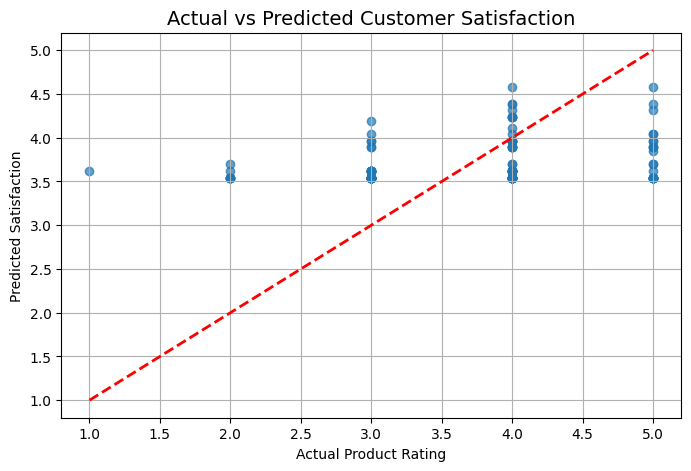

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["productRate"], df["predicted_satisfaction"], alpha=0.7)
plt.plot([df["productRate"].min(), df["productRate"].max()],
         [df["productRate"].min(), df["productRate"].max()],
         color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Customer Satisfaction", fontsize=14)
plt.xlabel("Actual Product Rating")
plt.ylabel("Predicted Satisfaction")
plt.grid(True)
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = df.dropna(subset=["timeSpend", "productRate", "visitNo"])
X = df[["timeSpend", "visitNo"]]
y = df["productRate"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R² Score: -0.005499699475007613
MSE: 0.36874658166002167
Coefficients: [ 0.08161929 -0.37953022]
Intercept: 4.647291126743182


In [20]:
X = df[["timeSpend", "visitNo", "serviceRate", "ambianceRate", "priceRate", "wifiRate", "promoRate"]]
y = df["productRate"]

df = df.dropna(subset=X.columns.tolist() + ["productRate"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(" Improved Model Performance")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

 Improved Model Performance
R² Score: -0.096
MSE: 0.402
Coefficients: [ 0.14067023 -0.20284133  0.1808559   0.36511459  0.2397506   0.06229521
 -0.08788861]
Intercept: 1.5320426953007478


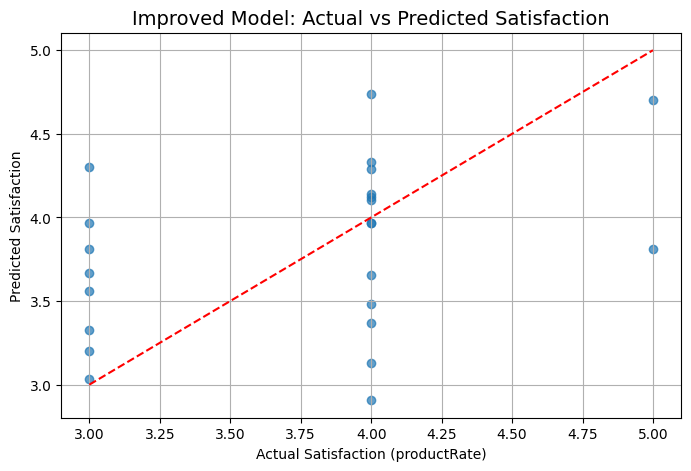

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Improved Model: Actual vs Predicted Satisfaction", fontsize=14)
plt.xlabel("Actual Satisfaction (productRate)")
plt.ylabel("Predicted Satisfaction")
plt.grid(True)
plt.show()